In [1]:
import torch
import torchvision
from torchview import draw_graph
from models import StackedBLSTMCNN

import yaml
import os
import graphviz

In [2]:
# Add GraphViz to path
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin'

In [3]:
# Load checkpoint
config_path = 'cnn_blstm.yaml'
with open(config_path, 'r') as f:
    config = yaml.safe_load(f)

# Load the model
model = StackedBLSTMCNN(config_path)
model.load_state_dict(torch.load('checkpoints/blstm_cnn_h128_2025_04_06_epoch_41.pt', weights_only=False))
model

StackedBLSTMCNN(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
  )
  (lstm): LSTM(16448, 128, num_layers=3, batch_first=True, bidirectional=True)
  (projection): Linear(in_features=256, out_features=4112, bias=True)
  (decoder): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), pa


(process:28556): Pango-WARNING **: 18:18:55.319: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


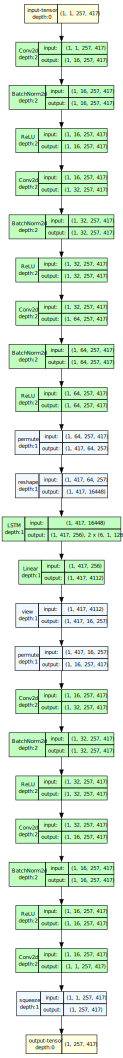

In [13]:
model_graph = draw_graph(
    model,
    input_size=(1, 1, 257, 417),
    graph_dir='TB',
    expand_nested=False,
    hide_inner_tensors=True,
    hide_module_functions=True
)

model_graph.visual_graph

In [6]:
model_graph.visual_graph.attr(size="1920,1080")

model_graph.visual_graph.render(
    filename="blstm_cnn_model",
    format="png"
)


(process:43272): Pango-WARNING **: 18:07:28.501: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


'blstm_cnn_model.png'

In [ ]:
# Export computation graph
from torchviz import make_dot
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dot = make_dot(model(torch.ones(1, 1, 257, 417).to(device))).render("filename", format="svg")

In [ ]:
# Load GAN model
generator = 